# Ayush Makade
# BE CMPN A
# 21102A0052
##### https://github.com/AyushMakade/Machine-Learning/tree/main/Predicting%20Housing%20Prices

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [11]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [12]:
# Data Preprocessing

# Handle missing values
df = df.dropna()

# Extract the feature matrix (X) and the target variable (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Identifying categorical features
categorical_features = ['ocean_proximity']

# Creating a preprocessing pipeline to handle categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

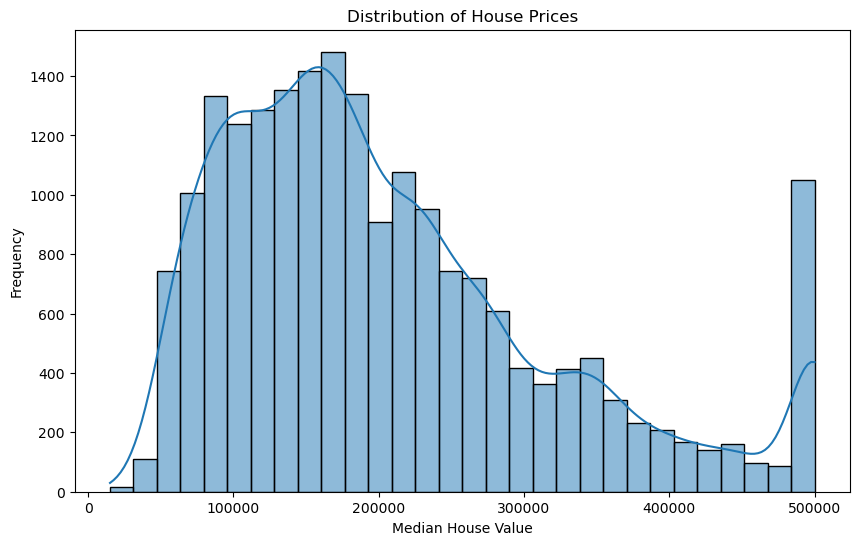

C:\Users\ayush\AppData\Local\Temp\ipykernel_14264\1848633475.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


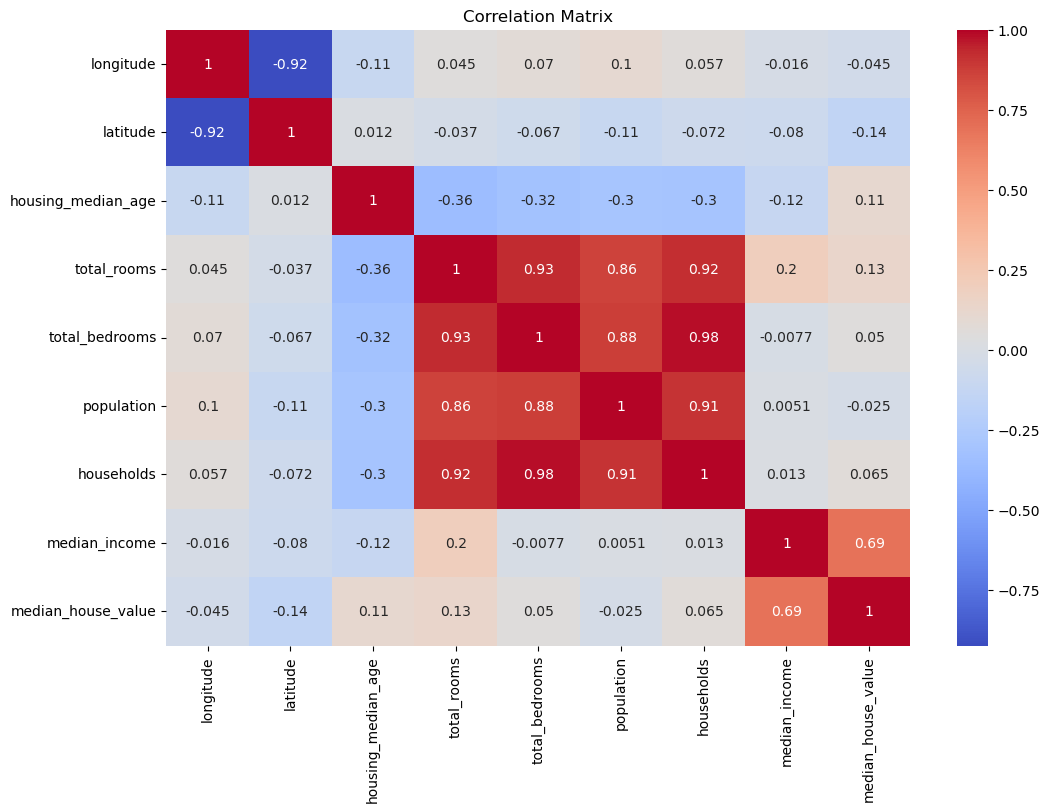

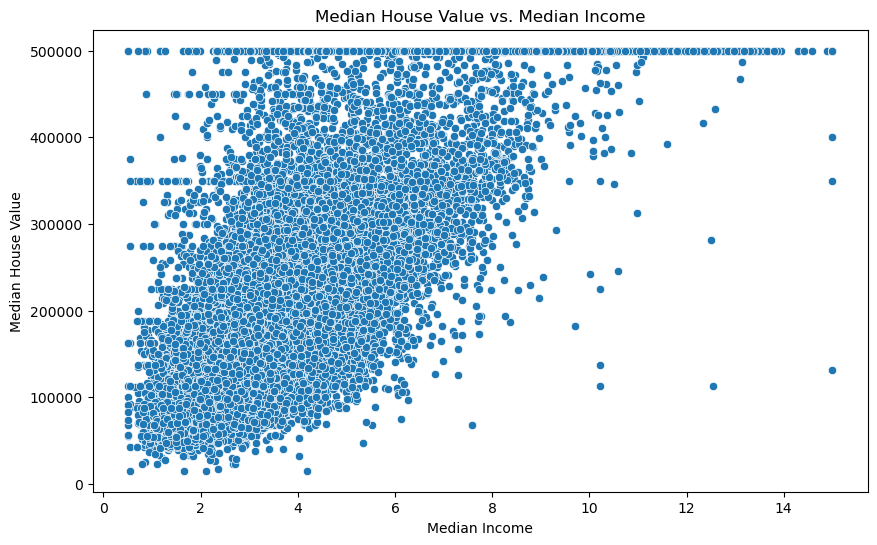

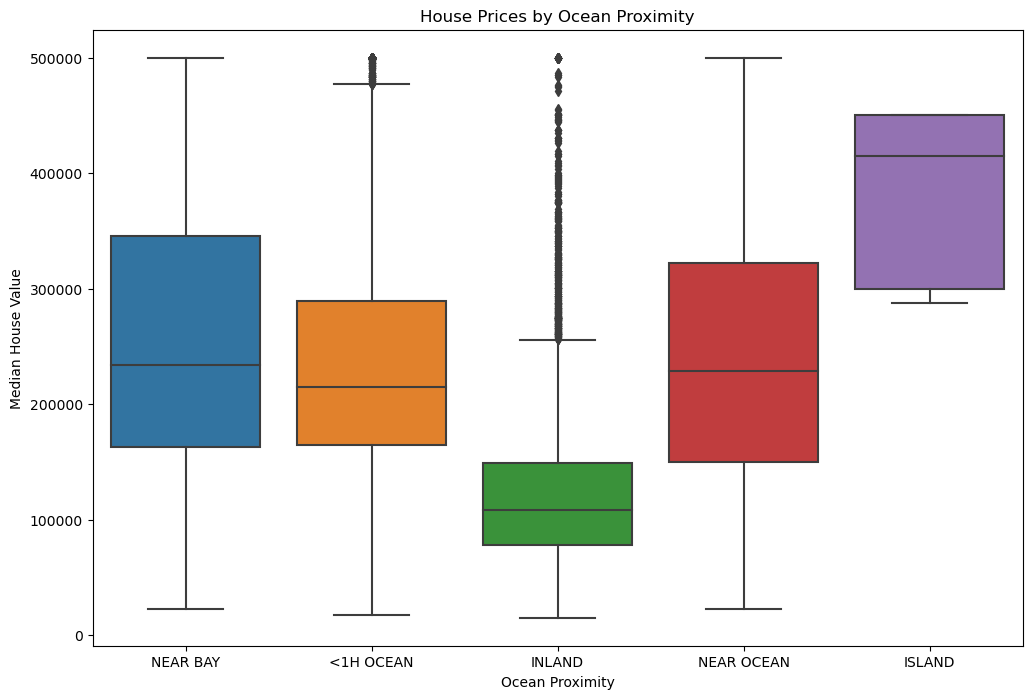

In [13]:
# Exploratory Data Analysis (EDA)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between features and the target variable
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot of median house value vs. median income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='median_income', y='median_house_value')
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Boxplot of house values by ocean proximity
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('House Prices by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

In [14]:
# Model Development

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the linear regression model on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model using metrics
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 50413.43330809992
Mean Squared Error (MSE): 4802173538.604357
R-squared (R²): 0.6488402154431849


In [16]:
# Perform cross-validation to ensure the model's robustness
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-np.mean(cv_scores)}')

Cross-Validation MSE: 5425458448.667015


In [18]:
# Model Deployment

# Save the trained model for future predictions
joblib.dump(pipeline, 'housing_price_model.pkl')

# Simple User Interface (UI) for prediction
def predict_price():
    model = joblib.load('housing_price_model.pkl')
    
    print("Please enter the following details:")
    longitude = float(input("Longitude: "))
    latitude = float(input("Latitude: "))
    housing_median_age = float(input("Housing Median Age: "))
    total_rooms = float(input("Total Rooms: "))
    total_bedrooms = float(input("Total Bedrooms: "))
    population = float(input("Population: "))
    households = float(input("Households: "))
    median_income = float(input("Median Income: "))
    ocean_proximity = input("Ocean Proximity (choices: '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'): ")
    
    features = [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
    
    # Convert features to a DataFrame to match the input format of the pipeline
    feature_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                     'population', 'households', 'median_income', 'ocean_proximity']
    features_df = pd.DataFrame([features], columns=feature_names)
    
    predicted_price = model.predict(features_df)
    print(f'Predicted House Price: ${predicted_price[0]:.2f}')

# Run the prediction UI
predict_price()

Please enter the following details:
Longitude: -122.23
Latitude: 37.88
Housing Median Age: 41
Total Rooms: 880
Total Bedrooms: 129
Population: 322
Households: 126
Median Income: 8.3252
Ocean Proximity (choices: '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'): 'NEAR BAY'
Predicted House Price: $449341.58
